<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

<h3><font color = "#079e05"> Utilities </font></h3>

In [ ]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [ ]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

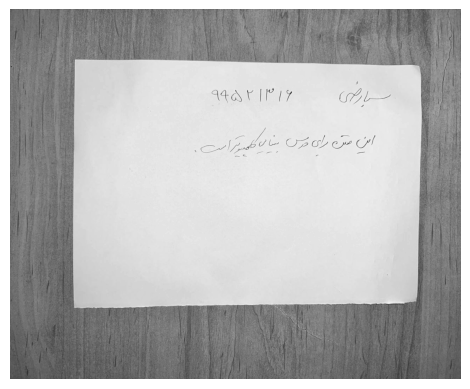

In [ ]:
im = cv2.imread('Q4.jpg' , cv2.IMREAD_GRAYSCALE)
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

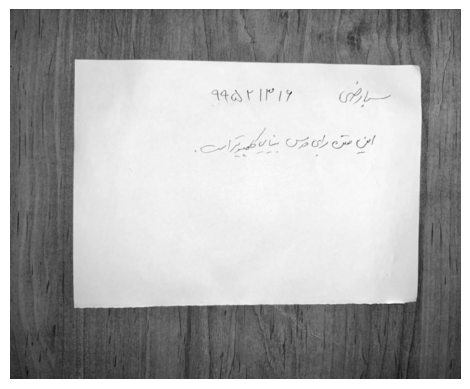

In [ ]:
#denoise image
blur = cv2.GaussianBlur(im, (5, 5), 0)
imshow(blur)

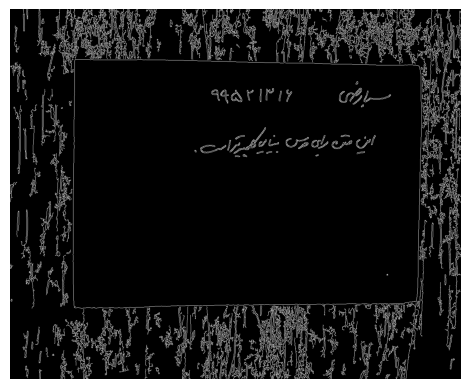

In [ ]:
#find all edges
edges = cv2.Canny(np.uint8(blur), 20, 90)
imshow(edges)

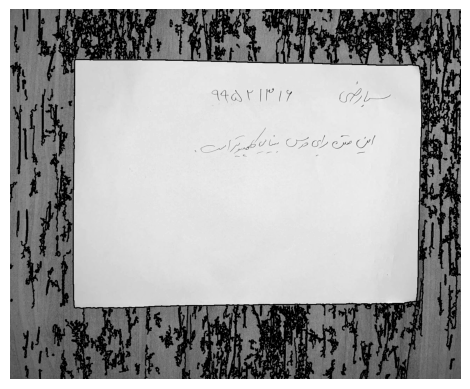

In [ ]:
#find the contours 
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#draw the contours
cv2.drawContours(im, contours, -1, (0, 255, 255),2)
#find the max contour 
the_contour = max(contours , key = cv2.contourArea)
#consider the contours that have the ability to be corner
corners = cv2.approxPolyDP(the_contour , 0.04 * cv2.arcLength(the_contour, True), True)
imshow(im)

In [ ]:
src_points = np.array([corners[0][0] , corners[3][0] , corners[2][0] , corners[1][0]], np.float32)
width = 900
height = 700
dst_points = np.float32([[0,0], [width,0], [width,height], [0,height]])
# Compute the transformation matrix
M = cv2.getPerspectiveTransform(src_points, dst_points)

# apply the perspective transformation to the image
result = cv2.warpPerspective(im, M, (width, height))

<h3><font color = "#079e05"> Show the result </font></h3>

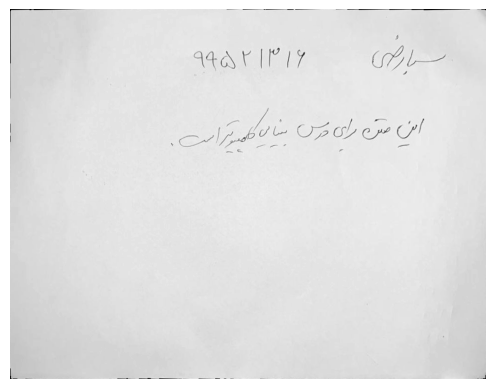

In [ ]:
imshow(result)